In [4]:
import lucem_illud_2020 #pip install git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas as pd #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls
import bs4 #called `beautifulsoup4`, an html parser
import gensim#For word2vec, etc

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

#These come with Python
import re #for regexs
import urllib.parse #For joining urls
import io #for making http requests look like files
import json #For Tumblr API responses
import os.path #For checking if files exist
import os #For making directories

In [5]:
import importlib
import helper_functions as fcns
import data_ingest as ing

In [65]:
importlib.reload(fcns)
importlib.reload(ing)

<module 'data_ingest' from '/Users/daminisharma/Dropbox/Harris MSCAPP/2019-20_Q3_Spring/Content Analysis/american-prison-writing_nlp/analysis/data_ingest.py'>

In [8]:
data_directory = '../data/'
filename = 'APW_final.csv'
df = ing.load_prep_data(data_directory+filename)
df = ing.agg_groups(df, 'race','race_agg',['African American','Latina/o / Hispanic','Multiracial','No information','White (non-Hispanic)'])
df = ing.agg_groups(df, 'gender','gender_agg',['Female','Male','No Information'])
df = ing.norm_text(df)
df = ing.norm_sent(df)
df = ing.norm_words(df)
df.head(2)

,url,title,text,date_written,pages,relation_to_prison,race,state,gender,race_agg,gender_agg,tokenized_text,normalized_text,tokenized_sents,normalized_sents
0,/islandora/object/apw%3A12341395?solr_nav%5Bid...,A person cannot become who they need to be by ...,A PERSON CANNOT BECOME WHO THEY NEED TO BE BY...,2014-03-18,2 pages,Death Row Prisoner,White (non-Hispanic),Indiana,Male,White (non-Hispanic),Male,"[A, PERSON, CANNOT, BECOME, WHO, THEY, NEED, T...","[person, need, remain, wesley, purkey, federal...","[[A, PERSON, CANNOT, BECOME], [WHO, THEY, NEED...","[[person], [need], [remaining], [], [], [wesle..."
1,/islandora/object/apw%3A12341549?solr_nav%5Bid...,It is good justice is blind because she would ...,It is Good Justice is Blind Because She Would ...,2014-03-18,2 pages,Death Row Prisoner,White (non-Hispanic),Indiana,Male,White (non-Hispanic),Male,"[It, is, Good, Justice, is, Blind, Because, Sh...","[good, justice, blind, like, thing, wesley, pu...","[[It, is, Good, Justice, is, Blind, Because, S...","[[good, justice, blind, like, things], [wesley..."


# Word2Vec

In [14]:
w2v = fcns.word_2_vec(df)

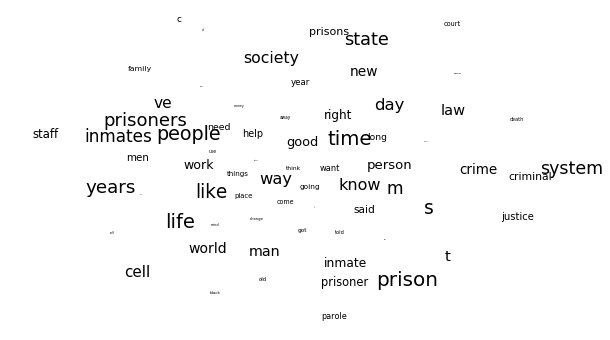

<Figure size 432x288 with 0 Axes>

In [17]:
fcns.visualize_W2V(w2v)

In [66]:
most_similar_table = fcns.most_similar_table(w2v,['black','white','prison'])

In [67]:
most_similar_table

,black,white,prison
0,"(white, 0.95)","(black, 0.95)","(entire, 0.69)"
1,"(color, 0.83)","(hispanic, 0.88)","(penal, 0.65)"
2,"(hispanic, 0.83)","(panther, 0.84)","(prisons, 0.64)"
3,"(panther, 0.82)","(brown, 0.83)","(general, 0.63)"
4,"(african, 0.82)","(male, 0.83)","(penitentiary, 0.63)"
5,"(mexican, 0.78)","(mexican, 0.83)","(super, 0.58)"
6,"(latino, 0.78)","(supremacists, 0.82)","(total, 0.57)"
7,"(male, 0.77)","(latino, 0.81)","(segments, 0.56)"
8,"(blacks, 0.77)","(supremacy, 0.79)","(current, 0.55)"
9,"(whites, 0.76)","(collar, 0.79)","(acc, 0.54)"


In [61]:
#type(w2v.most_similar('guard'))

In [60]:
#dict_similar = {}

In [59]:
#dict_similar['guard'] = [(x[0],round(x[1],2)) for x in w2v.most_similar('guard')]
#dict_similar['prison'] = [(x[0],round(x[1],2)) for x in w2v.most_similar('prison')]

In [53]:
#list_comp = 

In [54]:
#list_comp

In [57]:
#df_titles_gender = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in dict_similar.items() ]))

In [58]:
#df_titles_gender